In [108]:
# Load Python Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# Read CSV
df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [110]:
# See the dataframes's columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [111]:
# Only interested in Country, YearsCodePro, Employment, and ConvertedComp (Salary)
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]

# Rename the convertedcomp variable to salary
df = df.rename({'ConvertedComp':'Salary'}, axis = 1)

In [112]:
df['Salary'].unique()

# Values in Salary column has null values. Remove null values
df = df[df['Salary'].notnull()]

In [113]:
# Check if there are any null values in other columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


There are null values in other variables

In [114]:
# Remove all null values
df = df.dropna()

#If the sum of all null values = 0, we successfully removed all null values
print(df.isnull().sum())

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64


In [115]:
# See the values in Employment column
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [116]:
# Maintain all the Employed full-time rows, but remove the Employment column as we only care about Employed full-time
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis = 1)
df

,Country,EdLevel,YearsCodePro,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,38916.0
...,...,...,...,...
64135,Denmark,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,38208.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,19428.0
64152,United States,Some college/university study without earning ...,20,200.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,15048.0


In [117]:
# See the counts of each value in the Country variable
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

Countries such as Benin, Figi, San Marino each have a count of 1, and that is not ideal as a model cannot learn from a single point. Therefore, remove those with a count < 400

In [118]:
# Create a fxn called shorten_categories to set this cutoff
def shorten_categories(categories, cutoff):
  categorical_map = {}
  for i in range(len(categories)):
    if categories.values[i]  >= cutoff:
      categorical_map[categories.index[i]] = categories.index[i]
    else:
      categorical_map[categories.index[i]] = 'Other'
  return categorical_map

In [119]:
# Data points/rows countries with less than 400 will be called other
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

Use matplotlib and pandas libraries to create a boxplot to visualize the distribution of salaries (in US$) across different countries.

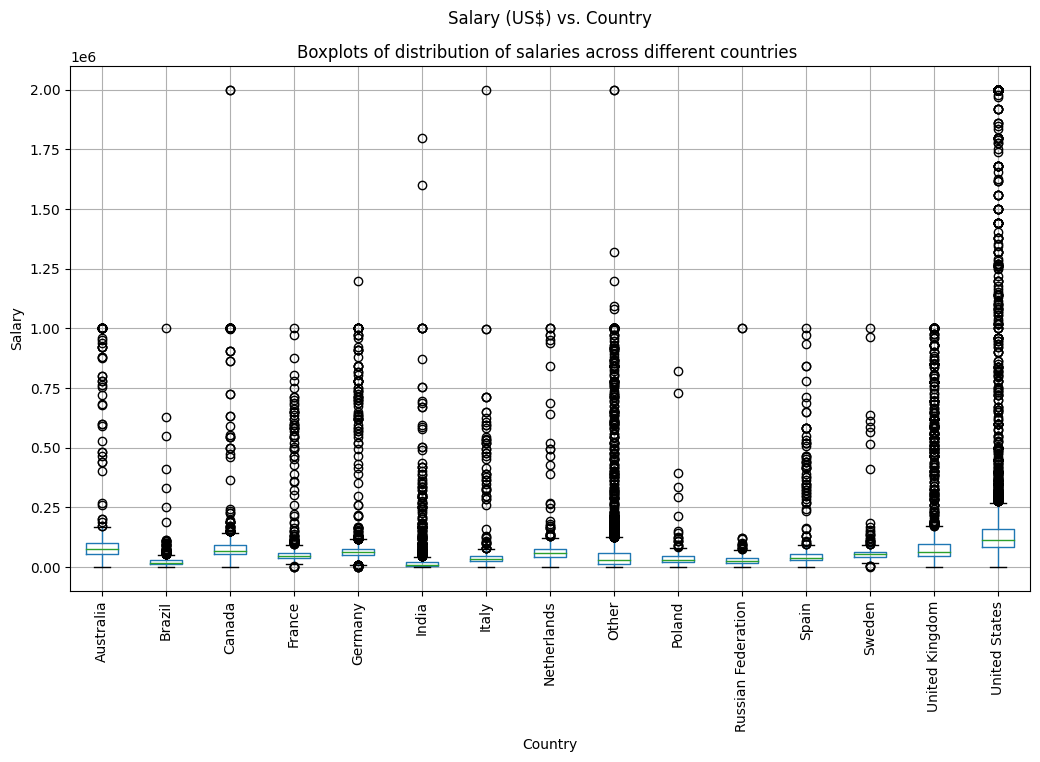

In [120]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary (US$) vs. Country')
plt.title('Boxplots of distribution of salaries across different countries ')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

Based on the boxplots of all the countries, there are numerous outliers, and most of the data is within a salary between 10,000 and 250,000. Now make the salary to be between 10,000 and 250,000, and remove the rows with Other


In [121]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

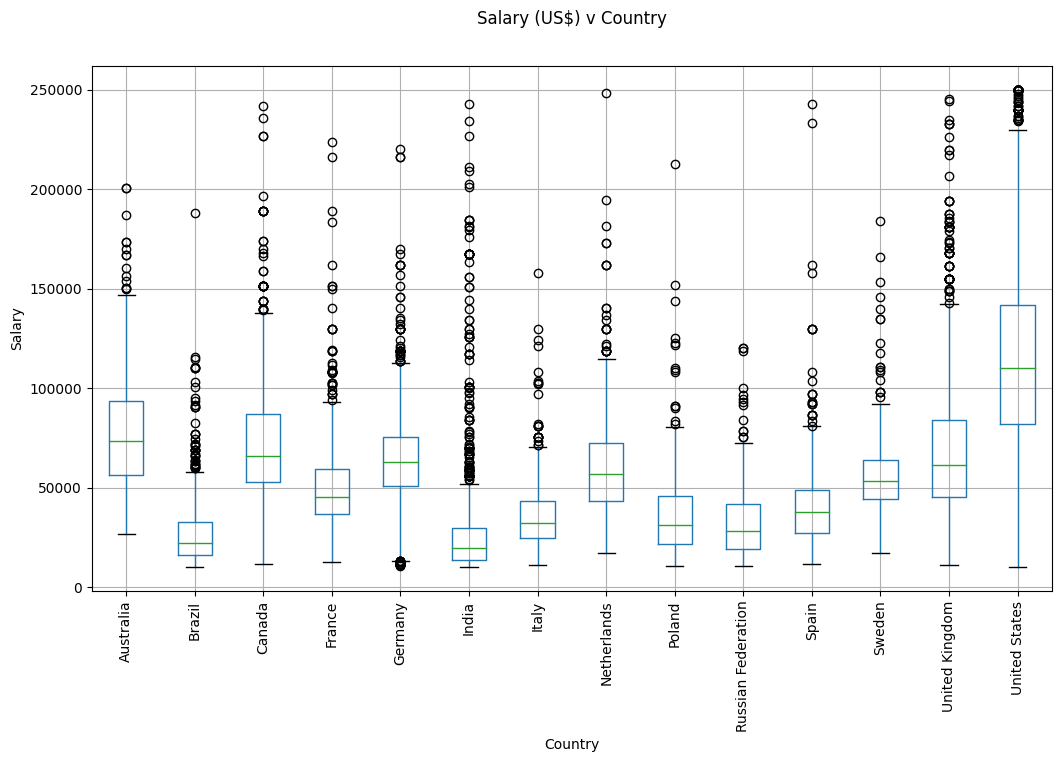

In [122]:
# Draw same plot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [123]:
# See the unique values of the variable YearsCodePro
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

There are values like Less than 1 year and more than 50 years. Make a function called clean_experience that sets More than 50 years to 50 and less than 1 year to 0.5

In [124]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [125]:
# See the unique values of EdLevel
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [126]:
# Only care about bachelors, masters, professional, doctoral
# Rename them & make professional & doctoral called post grad
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

Model Training

In [127]:
# The variables Edlevel and country are strings, and we need to convert those to a number form
# so we can train the model. Use the LabelEncoder functionality
# Each value will be converted to a number
from sklearn.preprocessing import LabelEncoder

# Encode education
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

# Encode country
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])


In [128]:
# We are trying to predict the salary so y should be salary, and the other variables are x
y = df['Salary']
x = df.drop('Salary', axis = 1)

Linear regression is a widely used and effective method for predicting variables because of its simplicity and interpretability. It assumes a linear relationship between the input features and the target variable, making it easy to understand the impact of each feature on the prediction. Additionally, linear regression can be applied to both numerical and categorical data, making it a versatile choice for a wide range of prediction tasks in various fields like finance, economics, and machine learning.

Use MSE when:

You are interested in comparing different models solely based on their prediction performance, without concern for the unit of measurement of the target variable.
You prefer working with a simpler, computationally efficient metric, as MSE does not require taking the square root.

Use RMSE when:

You want to interpret the prediction error in the same unit as the target variable, which makes it easier to understand the magnitude of errors in a practical context.
You need a metric that is more intuitive to communicate to non-technical stakeholders, as the RMSE is directly interpretable and has the same unit as the original data.
You want to penalize larger prediction errors more heavily, as RMSE emphasizes the impact of outliers due to the square root operation.


In general, RMSE is more commonly used in practice due to its interpretability and ease of communication. However, both MSE and RMSE are widely used and acceptable metrics for evaluating regression models. The choice ultimately depends on the specific requirements and objectives of your analysis or project.









In [129]:
# Import the LinearRegression class from scikit-learn's linear_model module.
# It allows us to use the linear regression algorithm for modeling and predicting data.
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

y_pred = linear_reg.predict(x)

# Use Mean Squared Error as it provides a measure of how well the model's predictions match
# the actual values of the target variable. The MSE is a common evaluation metric for
# regression models, and it quantifies the average squared difference between the predicted
# values and the true values.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Calculate RMSE (Root Mean Squared Error)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))


$39,274.75


We got a RMSE of 39,274.75 utilizing the Linear Regression Approach. Let's try another approach: DecisionTreeRegressor

 DecisionTreeRegressor is a powerful and interpretable algorithm that can handle various types of data and capture complex relationships between features and target variables. It is a valuable tool in regression tasks, especially when interpretability and transparency are essential.

 However, decision trees also have some limitations, such as a tendency to overfit on complex datasets and sensitivity to small variations in the data. To address these issues, ensemble methods like Random Forest and Gradient Boosting are commonly employed, which utilize multiple decision trees to create more robust and accurate models.



In [130]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

y_pred = dec_tree_reg.predict(x)

error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$29,414.94


The RMSE is less than linear regression approach. Let's try RandomForestRegressor

DecisionTreeRegressor is simpler, more interpretable, and faster to train, but it is more prone to overfitting and may not provide the highest accuracy on complex datasets. RandomForestRegressor, on the other hand, is a powerful ensemble method that reduces overfitting, improves accuracy, and provides feature importance information. It is well-suited for more complex datasets but may be less interpretable due to its ensemble nature. The choice between the two depends on the specific characteristics of the data, the interpretability required, and the trade-offs between simplicity and accuracy.

In [131]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=34)
random_forest_reg.fit(x, y.values)

y_pred = random_forest_reg.predict(x)

error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,493.57


Did not change much compared to the DecisionTreeRegressor. It actually increased

- Perform hyperparameter tuning for a DecisionTreeRegressor model using grid search. - Search for the best combination of hyperparameters (specifically, the max_depth of the decision tree) by evaluating different options with negative mean squared error as the scoring metric.
- After finding the best hyperparameters, train the optimized DecisionTreeRegressor on the data and calculates the root mean squared error (RMSE) between the true target values and the predictions.

In [132]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,428.51


Pickle is a Python module used for serializing and deserializing Python objects. It allows you to convert complex data structures, such as lists, dictionaries, and trained machine learning models, into a format that can be easily stored in a file or transferred over the network. Pickle enables you to save the state of objects to disk and later restore them, making it useful for caching, model persistence, and sharing data between different Python programs.

In [133]:
import pickle

data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl3', 'wb') as file:
    pickle.dump(data, file)
